Let's play a bit with geopandas and output the shape files for the WRA's water quality data.

In [2]:
import numpy as np
import pandas as pd

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Rename and organize the data
in order to fit the naming and column naming of the water level data.

In [5]:
zafwa_df = pd.read_excel(
    'data/wra_1992-2019_compile_20210421.xlsx',
    index_col=0
    )

In [7]:
zafwa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2852 entries, 1992-06-08_9010111 to 2019-10-03_9200221
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   井號              2852 non-null   object        
 1   井名              2852 non-null   object        
 2   井別              2852 non-null   object        
 3   取樣日期            2852 non-null   datetime64[ns]
 4   檢驗日期            108 non-null    datetime64[ns]
 5   Hard(mg/L)      836 non-null    float64       
 6   CL(mg/L)        2013 non-null   float64       
 7   HCO3(mg/L)      1252 non-null   float64       
 8   SO4(mg/L)       1921 non-null   float64       
 9   NO3_N(mg/L)     1614 non-null   float64       
 10  NH3_N(mg/L)     2097 non-null   float64       
 11  Ca(mg/L)        2024 non-null   float64       
 12  Mg(mg/L)        2022 non-null   float64       
 13  K(mg/L)         2008 non-null   float64       
 14  Na(mg/L)        2025 non-null 

In [9]:
# drop the id to be consistent to the water level data
zafwa_df.reset_index(drop=True, inplace=True)

In [10]:
zafwa_df.head()

,井號,井名,井別,取樣日期,檢驗日期,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),...,Pb(mg/L),Temp(度),PH,EC(uS/cm),Organ_N,TOC(mg/L),CO3(mg/L),TSS(mg/L),Eh,sheet
0,9010111,虎溪(1),自記站,1992-06-08,1992-06-08,310.0,17.69,0.0,65.42,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1992
1,9010221,石榴(2),自記站,1992-06-08,1992-06-08,139.0,8.84,0.0,35.59,1.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1992
2,9030111,虎尾(1),自記站,1992-06-08,1992-06-08,382.0,12.41,0.0,139.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1992
3,9030121,虎尾(2),自記站,1992-06-08,1992-06-08,420.0,23.00,0.0,121.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1992
4,9030211,芳草(1),自記站,1992-06-08,1992-06-08,269.0,8.84,0.0,108.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1992


In [11]:
excel_df = pd.read_excel('data/環保署水利署地下水井.xlsx')
excel_df.head()

,SiteId,SiteName,SiteEngName,County,Township,UgwDistName,TWD97Lon,TWD97Lat,TWD97TM2X,TWD97TM2Y,SiteAddress,StatusOfUse,數據紀錄始,數據紀錄終,資料數,data
0,4035,二林營運所,Erling Operation Center,彰化縣,二林鎮,濁水溪沖積扇,NaN,NaN,NaN,NaN,彰化縣二林鎮儒林路二段100號,廢站,1993/04,1999/05,18.0,環保署
1,4413,二崙國小,ErLun Elementary School,雲林縣,二崙鄉,濁水溪沖積扇,120.415102,23.771842,190386.40,2629878.33,雲林縣二崙鄉崙東村中興路36號,啟用,1999/08,2020/10,81.0,環保署
2,4133,二崙國小,ErLun Elementary School,雲林縣,二崙鄉,濁水溪沖積扇,NaN,NaN,NaN,NaN,雲林縣二崙鄉崙東村中興路36號,廢站,NaN,NaN,NaN,環保署
3,4403,口湖國小青蚶分校,"Kaohu Elementary School, Chingan Subdivision",雲林縣,口湖鄉,濁水溪沖積扇,120.161008,23.597331,164374.03,2610680.84,雲林縣口湖鄉青蚶村93號,啟用,1999/12,2020/10,84.0,環保署
4,4139,口湖國小青蚶分校,"Kaohu Elementary School, Chingan Subdivision",雲林縣,口湖鄉,濁水溪沖積扇,NaN,NaN,NaN,NaN,雲林縣口湖鄉青蚶村93號,廢站,NaN,NaN,NaN,環保署


In [22]:
len(zafwa_df) - len(zafwa_df[zafwa_df['井號'].isin(excel_df.SiteId)])

659

It has 659 data points not the well listed in the excel.

In [30]:
print(len(zafwa_df.loc[zafwa_df['井號'].isin(excel_df.SiteId), '井號'].unique()))
print(len(zafwa_df['井號'].unique()))

221
291


In [38]:
# no need to use multiprocess because the small data size
zafwa_mo = pd.DataFrame()
for well_id in zafwa_df.loc[zafwa_df['井號'].isin(excel_df.SiteId), '井號'].unique():
    X =  zafwa_df[zafwa_df['井號'] == well_id].copy()
    X['井名'] = np.repeat(excel_df.loc[excel_df.SiteId.astype(str) == str(well_id), 'SiteName'].values, len(X))
    X['Lon'] = np.repeat(excel_df.loc[excel_df.SiteId.astype(str) == str(well_id), 'TWD97Lon'].values, len(X))
    X['Lat'] = np.repeat(excel_df.loc[excel_df.SiteId.astype(str) == str(well_id), 'TWD97Lat'].values, len(X))
    zafwa_mo = pd.concat([zafwa_mo, X], axis=0, join='outer')

In [40]:
zafwa_mo

,井號,井名,井別,取樣日期,檢驗日期,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),...,PH,EC(uS/cm),Organ_N,TOC(mg/L),CO3(mg/L),TSS(mg/L),Eh,sheet,Lon,Lat
2,9030111,虎尾(1),自記站,1992-06-08,1992-06-08,382.0,12.41,0.0,139.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1992,120.432291,23.714153
306,9030111,虎尾(1),自記站,1999-01-01,NaT,365.0,13.10,NaN,129.0,0.13,...,7.62,700.0,NaN,2.04,NaN,NaN,137.0,1999,120.432291,23.714153
307,9030111,虎尾(1),自記站,1999-01-01,NaT,365.0,13.10,NaN,129.0,0.13,...,7.62,700.0,NaN,2.04,NaN,NaN,137.0,1999,120.432291,23.714153
680,9030111,虎尾(1),自記站,2000-01-01,NaT,273.0,14.50,NaN,78.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,120.432291,23.714153
681,9030111,虎尾(1),自記站,2000-01-01,NaT,NaN,NaN,NaN,NaN,NaN,...,7.45,997.5,NaN,NaN,NaN,NaN,NaN,2000,120.432291,23.714153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,9130222,興化(2),自記站,2019-09-23,NaT,284.0,3.10,255.0,80.9,0.02,...,7.86,346.0,NaN,0.20,1.0,NaN,-38.0,2019,120.289012,23.760169
2810,9130232,興化(3),自記站,2019-09-23,NaT,123.0,2.60,233.0,15.7,0.02,...,7.86,341.0,NaN,0.10,1.0,NaN,-44.0,2019,120.289012,23.760169
2839,9170411,客厝(1),自記站,2019-10-02,NaT,386.0,3.10,257.0,3.0,0.02,...,7.81,281.0,NaN,0.50,1.0,NaN,-37.0,2019,120.342364,23.624799
2840,9170421,客厝(2),自記站,2019-10-02,NaT,217.0,1.60,267.0,2.8,0.02,...,8.06,291.0,NaN,0.70,1.0,NaN,-51.0,2019,120.342364,23.624799


In [45]:
# exclude Lon & Lat to fit the format of database_ZAF_wl_clean_20211008.csv
zafwa_mo.iloc[:, :-2].to_csv('data/database_ZAF_wa_clean_{}.csv'.format(date), index=False)
# append these water quality data to the hdf file
zafwa_mo.to_hdf('data/database_ZAF_clean_gps_{}.hd5'.format(date), key='wa', mode='a', encoding='utf-8')
# in case NCDR need it
zafwa_mo.to_csv('data/database_ZAF_wa_clean_gps_{}.csv'.format(date), index=False, encoding='utf-8')

C:\Users\An-Sheng\Miniconda3\envs\ncdr\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->Index(['井號', '井名', '井別'], dtype='object')]

  pytables.to_hdf(


# Play Geopandas

In [47]:
# to avoid errors later exporting shape files
zafwa_mo['檢驗日期'] = zafwa_mo['檢驗日期'].astype(str)
zafwa_mo['取樣日期'] = zafwa_mo['取樣日期'].astype(str)

In [82]:
import geopandas as gd
gdf = gd.GeoDataFrame(
    zafwa_mo, 
    geometry=gd.points_from_xy(zafwa_mo.Lon, zafwa_mo.Lat), 
    crs='EPSG:4326'
    )

In [83]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
gdf.head()

,井號,井名,井別,取樣日期,檢驗日期,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),...,EC(uS/cm),Organ_N,TOC(mg/L),CO3(mg/L),TSS(mg/L),Eh,sheet,Lon,Lat,geometry
2,9030111,虎尾(1),自記站,1992-06-08,1992-06-08,382.0,12.41,0.0,139.0,0.00,...,NaN,NaN,NaN,NaN,NaN,0.0,1992,120.432291,23.714153,POINT (120.43229 23.71415)
306,9030111,虎尾(1),自記站,1999-01-01,NaT,365.0,13.10,NaN,129.0,0.13,...,700.0,NaN,2.04,NaN,NaN,137.0,1999,120.432291,23.714153,POINT (120.43229 23.71415)
307,9030111,虎尾(1),自記站,1999-01-01,NaT,365.0,13.10,NaN,129.0,0.13,...,700.0,NaN,2.04,NaN,NaN,137.0,1999,120.432291,23.714153,POINT (120.43229 23.71415)
680,9030111,虎尾(1),自記站,2000-01-01,NaT,273.0,14.50,NaN,78.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000,120.432291,23.714153,POINT (120.43229 23.71415)
681,9030111,虎尾(1),自記站,2000-01-01,NaT,NaN,NaN,NaN,NaN,NaN,...,997.5,NaN,NaN,NaN,NaN,NaN,2000,120.432291,23.714153,POINT (120.43229 23.71415)


In [51]:
gdf.shape

(2193, 39)

<AxesSubplot:>

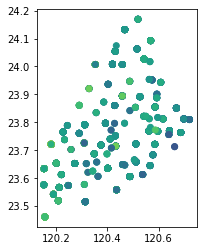

In [87]:
gdf.plot('Temp(度)')

<AxesSubplot:>

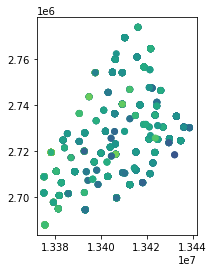

In [86]:
# project to TWD97
boroughs_twd = gdf.to_crs('EPSG:900913')
boroughs_twd.plot('Temp(度)')

## Export shape files

In [88]:
# exporting shape
cols = [_ for _ in gdf.columns]
#['SiteId', 'SiteName', 'Timedate', 'WaterLv_m', 'Lon', 'Lat', 'geometry']
i = 0
for new_col in ['SiteId', 'SiteName', 'SiteType', 'SampleDate', 'ExamDate']:
    cols[i] = new_col
    i += 1

cols

['SiteId',
 'SiteName',
 'SiteType',
 'SampleDate',
 'ExamDate',
 'Hard(mg/L)',
 'CL(mg/L)',
 'HCO3(mg/L)',
 'SO4(mg/L)',
 'NO3_N(mg/L)',
 'NH3_N(mg/L)',
 'Ca(mg/L)',
 'Mg(mg/L)',
 'K(mg/L)',
 'Na(mg/L)',
 'Aso',
 'Fe(mg/L)',
 'Mn(mg/L)',
 'Cd(mg/L)',
 'ECOLI(個/100mL)',
 'TDS(mg/L)',
 'ALK(mg/L)',
 'Sulfide',
 'Cr(mg/L)',
 'Cu(mg/L)',
 'Zn(mg/L)',
 'Pb(mg/L)',
 'Temp(度)',
 'PH',
 'EC(uS/cm)',
 'Organ_N',
 'TOC(mg/L)',
 'CO3(mg/L)',
 'TSS(mg/L)',
 'Eh',
 'sheet',
 'Lon',
 'Lat',
 'geometry']

In [89]:
for i, col in enumerate(cols):
    if len(col) > 10:
        print(i, col)

9 NO3_N(mg/L)
10 NH3_N(mg/L)
19 ECOLI(個/100mL)


In [90]:
cols[9] = 'NO3_N(ppm)'
cols[10] = 'NH3_N(ppm)'
cols[19] = 'ECOLI'

In [91]:
for i, col in enumerate(cols):
    if col == 'Temp(度)':
        cols[i] = 'Temp'

In [92]:
gdf.columns = cols

<AxesSubplot:>

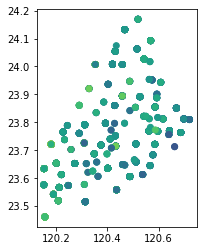

In [93]:
gdf.plot('Temp')

## Export shape files

In [94]:
gdf.to_file('data/ZAF_wa_wra_{}.shp'.format(date))